Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки для крупного интернет-магазина. Моя задача это приоретизация гипотез и анализ A/B-теста. 

**Описание данных**

Данные для первой части
 /datasets/hypothesis.csv.

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
 /datasets/orders.csv. 
transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Часть 1. Приоритизация гипотез.

##### Загрузка и знакомство

In [1]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# установки, чтобы было видно названия гипотез целиком
pd.set_option('display.max_colwidth', 100)

In [4]:
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Поскольку вся таблица просматривается проверки на пустые значения не требуется.

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Небольшая таблица, 9 строк, все столбцы в нужном формате. Единственное, хочется привети названия столбцов к нижнему регистру.


In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Данные готовы к проверке гипотез

##### Применение фреймворка ICE для приоритизации гипотез


In [8]:
# подсчет ICE
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

# оставим только два знака после запятой
hypothesis['ICE'] = hypothesis['ICE'].round(2)

# сортировка по ICE 
sorted_hypothesis_by_ICE = hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]
display(sorted_hypothesis_by_ICE)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [9]:
# добавим ранг в соответсвии с ICE, потом пригодится для сравнения двух показателей
sorted_hypothesis_by_ICE['rank_by_ICE'] = range(1, len(sorted_hypothesis_by_ICE) + 1)
display(sorted_hypothesis_by_ICE)

,hypothesis,ICE,rank_by_ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,9


##### Применение фреймворка RICE для приоритизации гипотез


In [10]:
# подсчет RICE
hypothesis['RICE'] = (hypothesis['reach']
                      * (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])

# сортировка по RICE 
sorted_hypothesis_by_RICE = hypothesis.sort_values(by = 'RICE', ascending = False)[['hypothesis','RICE']]
display(sorted_hypothesis_by_RICE)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [11]:
# добавим ранг в соответсвии с RICE
sorted_hypothesis_by_RICE['rank_by_RICE'] = range(1, len(sorted_hypothesis_by_ICE) + 1)
display(sorted_hypothesis_by_RICE)


,hypothesis,RICE,rank_by_RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0,4
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,9


##### Сравнительный анализ рангов приоритизации гипотез при применении RICE и ICE. 

Чтобы нагляднее сравнить объединим две таблицы гипотез с ICE и RICE, и посмотрим какие гипотезы занимают первые места в каждом методе.

In [12]:
# объединим две таблицы в одну для наглядности
merged_hypothesis = pd.merge(sorted_hypothesis_by_ICE, sorted_hypothesis_by_RICE, on='hypothesis', how='outer')

# выведем на экран только три колонки
display(merged_hypothesis[['hypothesis','rank_by_ICE','rank_by_RICE']])

,hypothesis,rank_by_ICE,rank_by_RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",1,5
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",2,3
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",3,1
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",4,4
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",5,2
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",6,7
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",7,8
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,6
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9,9


Основным отличием двух систем приоритизации гипотез является компонент Reach, который показывает, сколько пользователей затронет изменение, которое подразумевает внедрение гипотезы. Так например, "Запустить акцию, дающую скидку на товар в день рождения" (index 0)спускается на пятое место(RICE) c первого (ICE), поскольку охват пользователей очень низкий.  Таким образом, имеющие высокий ранг по ICE могут быть реализованы в кротчайшие сроки, но не будт иметь высокий охват пользователелей.

В тоже время "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (index 2) из-за выского параметра Reach (10 баллов) поднимает гипотезу с третьего (ICE) на первое место (RICE). Те гипотезы, которые имеют высокий ранг по RICE будут иметь бОльшую ценность на продолжительной дистанции, поскольку имеют выше охват пользователей.

Гипотезы, которые сохраняют схожие позиции в обеих метриках, вероятно, более универсальные и надежные, например "Добавить новые каналы привлечения трафика"(index 1) и "Баннеры с акциями на главной странице"(index 3). Как аналитик, я бы советовала сосредоточиться на этих гипотезах.

Реализация гипотез, имеющих низкий ранг, например "Собственная служба доставки" (index 5) и "Изменение структуры категорий" (index 7),  могут быть реализованы при наличии дополнительных ресурсов и время для экспериментов.

**Подвывод** По всем показателям, наиболее приоритетные задачи на данный момент:
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

#### Часть 2. Анализ A/B-теста

##### Загрузка и знкомство

In [13]:
# загрузка данных
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
display(orders.head(10))
display(visitors.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [15]:
print(orders.isnull().sum())
print(visitors.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Пустых значений нет, это радует

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Нужно преобразовать столбец 'date' в родной тип данных datetime

In [18]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [19]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные готовы к работе

Проверим на наличие прямых дубликатов

In [20]:
# Поиск дубликатов в таблице orders
duplicates_orders = orders.duplicated(subset=["transactionId", "visitorId", "date", "revenue", "group"])

# Подсчет дубликатов в таблице orders
count_duplicates_orders = duplicates_orders.sum()

# Поиск дубликатов в таблице visitors
duplicates_visitors = visitors.duplicated(subset=["date", "group", "visitors"])

# Подсчет дубликатов в таблице visitors
count_duplicates_visitors = duplicates_visitors.sum()

# Вывод количества дубликатов
print(f"В таблице orders {count_duplicates_orders} дубликатов.")
print(f"В таблице visitors {count_duplicates_visitors} дубликатов.")

В таблице orders 0 дубликатов.
В таблице visitors 0 дубликатов.


У нас нет дубликатов, это радует

In [21]:
# Подсчет уникальных пользователей в orders
unique_users_visitors = orders['visitorId'].nunique()

# Вывод количества уникальных пользователей
print(f"В таблице orders {unique_users_visitors} уникальных пользователей.")

В таблице orders 1031 уникальных пользователей.


In [22]:
# Подсчет уникальных групп в orders
unique_groups = orders['group'].nunique()

# Получение уникальных групп в orders
unique_group_values = orders['group'].unique()

# Вывод количества уникальных групп
print(f"В таблице orders {unique_groups} уникальных группы {unique_group_values}")


В таблице orders 2 уникальных группы ['B' 'A']


Всего 1031 пользователь, в двух группах А и Б. Посмотрим, нет ли пользователей, который оказались в двух группах одновременно.

In [23]:
# Группируем данные по visitorId и считаем количество уникальных значений для group
group_counts = orders.groupby('visitorId')['group'].nunique().reset_index()

# Фильтруем пользователей, которые есть в более чем одной группе
users_in_multiple_groups = group_counts[group_counts['group'] > 1]

# Выводим пользователей, которые есть в более чем одной группе
count_users_in_multiple_groups = users_in_multiple_groups.shape[0]

if count_users_in_multiple_groups > 0:
    print(f"Количество пользователей, присутствующих в более чем одной группе: {count_users_in_multiple_groups}")
else:
    print("Нет пользователей, которые оказались в двух группах одновременно.")

Количество пользователей, присутствующих в более чем одной группе: 58


Оказалось, 58 человек присутствуют и в группе A и в группе B. 

In [24]:
unique_users_visitors = orders['visitorId'].nunique()
relative_losses = count_users_in_multiple_groups/unique_users_visitors
print(f"Относительные потери: {relative_losses:.2%}")

Относительные потери: 5.63%


5 процентов многовато конечно, но думаю, лучше стоит убрать из рассмотрения.

In [25]:
# Получаем список ID этих пользователей
users_to_remove = users_in_multiple_groups['visitorId'].tolist()

# Удаляем заказы для этих пользователей из orders
orders = orders[~orders['visitorId'].isin(users_to_remove)]

In [26]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [27]:
# Подсчет уникальных пользователей в visitors после удаления участников двух групп
unique_users_visitors = orders['visitorId'].nunique()

# Вывод количества уникальных пользователей
print(f"В таблице orders {unique_users_visitors} уникальных пользователей.")

В таблице orders 973 уникальных пользователей.


Посмотрим сначала за какой период у нас данные

In [28]:
# Находим минимальную и максимальную дату
min_date = orders['date'].min()
max_date = orders['date'].max()

print(f"Данные доступны за период с {min_date} по {max_date}")

Данные доступны за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Доступны данные за месяц.

Данные готовы к работе.

##### Подсчет кумулятивных метрик

 Проведем преобразование данных для подсчета кумулятивных метрик

In [29]:
# таблица с уникальными парами значений 'date' и 'group'
datesGroups = orders[['date','group']].drop_duplicates()

In [30]:
print(datesGroups.head())

         date group
0  2019-08-15     B
7  2019-08-15     A
45 2019-08-16     A
47 2019-08-16     B
55 2019-08-01     A


In [31]:
# количество уникальных посетителей в группе теста по датам
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                        visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max',
                            'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)


In [32]:
display(visitorsAggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
# посчитаем суммарную выручку заказов в группе теста по датам
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max', 
                            'transactionId' : 'nunique',
                            'visitorId' : 'nunique', 
                            'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)


In [34]:
display(ordersAggregated.head())

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [35]:
# соединение ordersAggregated и visitorsAggregated по колонкам 'date', 'group'
cumulativeData = (
    ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                           right_on=['date', 'group'])
)

In [36]:
# переименование столбцов
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [37]:
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [38]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


Теперь по этим данным можно построить графики кумулятивной выручки

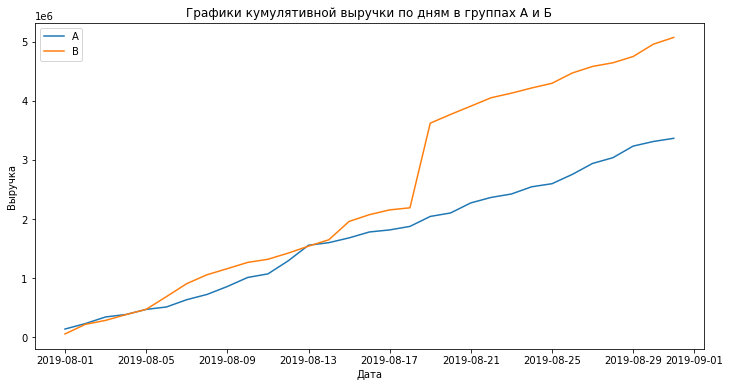

In [39]:
plt.figure(figsize=(12, 6)) 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Графики кумулятивной выручки по дням в группах A и Б")
plt.xlabel("Дата")
plt.ylabel("Выручка")

plt.legend()
plt.show()

Кажется наблюдаются значительные различия выручки между группами. Построим график кумулятивного среднего чека по группам.

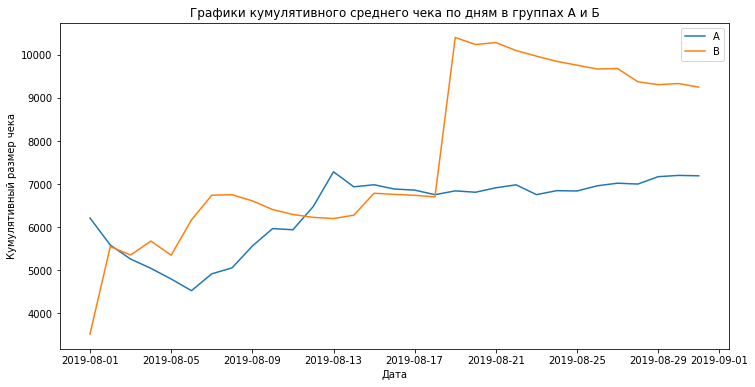

In [40]:
plt.figure(figsize=(12, 6)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Графики кумулятивного среднего чека по дням в группах A и Б")
plt.xlabel("Дата")
plt.ylabel("Кумулятивный размер чека")

plt.show()

В период с 17 по 21 очень резко вырос средний чек, значит был сделан очень крупный заказ, повлиявший на метрики.

Стоит построить график относительного различия кумулятивного среднего чека

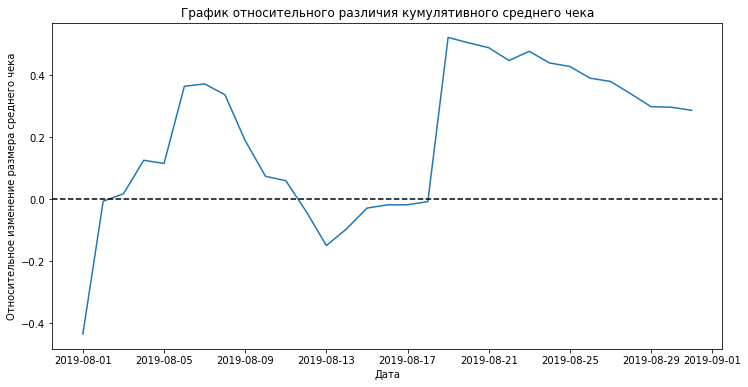

In [41]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6)) 
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного различия кумулятивного среднего чека")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение размера среднего чека")

plt.show()

На графике разницы средних чеков есть большой провал между 9 и 21 августа. Вероятно, в этот период были сделаны заказ, которые искажают статистику.

Построим график количества заказов на посетителя в группах.

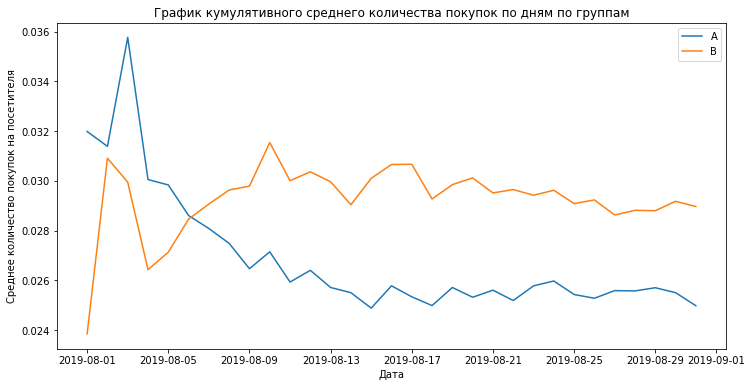

In [42]:
# считаем кумулятивное среднее количество покупок на посетителя
cumulativeData['cumulativeOrdersPerVis'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе Б
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize=(12, 6)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['cumulativeOrdersPerVis'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cumulativeOrdersPerVis'], label='B')
plt.legend()
plt.title("График кумулятивного среднего количества покупок по дням по группам")
plt.xlabel("Дата")
plt.ylabel("Среднее количество покупок на посетителя")

plt.show()

В группе А и B обнаруживается резкий скачок, и потом стаблизация вокруг некоторого среднего для каждой группы. Построим график относительной разницы среднего количества покупок между группами

In [43]:
mergedCumulativeOrdersPerVis = (
    cumulativeDataA[['date','cumulativeOrdersPerVis']]
    .merge(cumulativeDataB[['date','cumulativeOrdersPerVis']],
           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

In [44]:
mergedCumulativeOrdersPerVis.head()

,date,cumulativeOrdersPerVisA,cumulativeOrdersPerVisB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


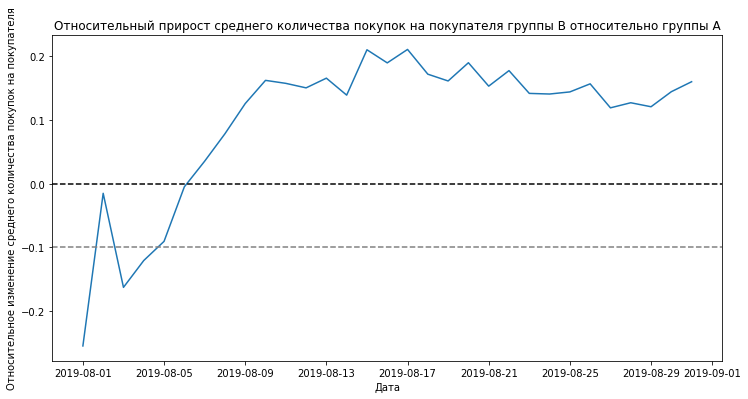

In [45]:
# строим графики
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeOrdersPerVis['date'],
         mergedCumulativeOrdersPerVis['cumulativeOrdersPerVisB']/mergedCumulativeOrdersPerVis['cumulativeOrdersPerVisA']-1)
plt.title("Относительный прирост среднего количества покупок на покупателя группы B относительно группы A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение среднего количества покупок на покупателя")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.show()

Группа B лидирует по количеству покупок на посетителя, она резко выросла в период с 5 по 9 августа и затем зафиксировалась вокруг 10-15 процентов. Стоит проанализировать аномалии, возможно, они изменят картину.

##### Анализ выбросов и аномалий

Для того, чтобы понять какие значения аномальные нужно изучить данные. Посмотрим сколько заказов обычно совершает пользователь

In [46]:
print(orders.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B


Построим точечный график количества заказов по пользователям

In [47]:
# агрегация данных по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

# новые названия осей
ordersByUsers.columns = ['userId', 'orders']

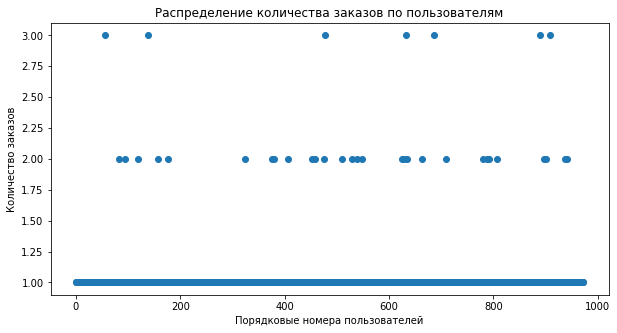

In [48]:
plt.figure(figsize=(10, 5))

# Создаем series для оси X, где каждому пользователю будет соответствовать порядковый номер
x_values = pd.Series(range(0, len(ordersByUsers)))

# Строим график
plt.scatter(x_values,ordersByUsers['orders'])

# Добавление подписей и названия
plt.title("Распределение количества заказов по пользователям")
plt.xlabel("Порядковые номера пользователей")
plt.ylabel("Количество заказов")

# Отображение графика
plt.show()

Кажется редко кто из пользователей совершает больше 2 заказов. Чтобы узнать точно посчитаем выборочные персентили.

In [49]:
percentiles = np.percentile(ordersByUsers['orders'], [90, 95, 99])

print(f"90-й перцентиль: {percentiles[0]} заказ")
print(f"95-й перцентиль: {percentiles[1]} заказа")
print(f"99-й перцентиль: {percentiles[2]} заказа")

90-й перцентиль: 1.0 заказ
95-й перцентиль: 1.0 заказа
99-й перцентиль: 2.0 заказа


Всего 1 процент пользователей совершает больше двух заказов.

Ознакомимся со стоимостью заказов, чтобы понять на какую сумму обычно заказывают пользователи. Построим точечный график стоимостей заказов.

In [50]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


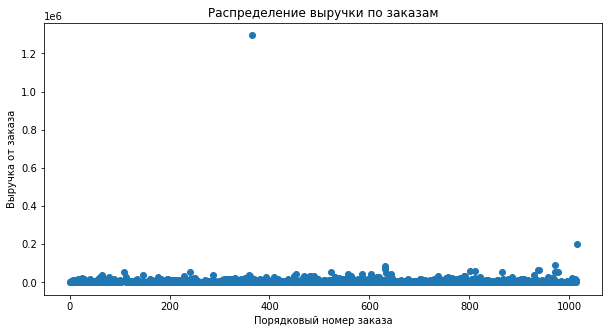

In [51]:
# задаем размер графика
plt.figure(figsize=(10, 5))

# Генерация значений для оси X на основе количества записей в столбце 'revenue'
x_values = pd.Series(range(0, len(orders['revenue'])))

# Отрисовка точечного графика
plt.scatter(x_values, orders['revenue'])

# Добавление подписей к осям
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Выручка от заказа')

# Добавление заголовка к графику
plt.title('Распределение выручки по заказам')

# Отображение графика
plt.show()

Все заказы сосредоточены в области дешевле 200 тыс. , и только один заказ стоимостью 1 млн 200 тыс. сильно выбивается из общей картины. Посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы определить границу для определения аномальных заказов.

In [52]:
percentiles = np.percentile(orders['revenue'], [90, 95, 99])

print(f"90-й перцентиль: {percentiles[0]:.2f}")
print(f"95-й перцентиль: {percentiles[1]:.2f}")
print(f"99-й перцентиль: {percentiles[2]:.2f}")

90-й перцентиль: 17990.00
95-й перцентиль: 26785.00
99-й перцентиль: 53904.00


Всего 5 процентов заказов с суммой заказа больше 26 тыс. и один процент заказов на сумму больше 53 тыс.

**Подвывод** Разумно выбрать 99 персентиль или 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Для стоимости заказов границей будет так же 99 персентиль и это 58 тыс.

##### Анализ A/B-теста

Посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке на посетителя между группами по «сырым» данным и очищенным. Но прежде подготовим данные.

In [53]:
display(orders.head(10))
display(visitors.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [54]:
# получим информацию о количестве посетителей для групп А и В для каждой даты.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [55]:
display(visitorsADaily.head(10))
display(visitorsBDaily.head(10))

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707
36,2019-08-06,655
37,2019-08-07,709
38,2019-08-08,654
39,2019-08-09,610
40,2019-08-10,369


In [58]:
# Создаем DataFrame ordersADaily для группы 'A',
# где для каждой даты считается количество уникальных заказов и их суммарная выручка

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# новые названия столбцов
ordersADaily.columns = ['date', 'ordersPerDateA']


In [59]:
# Создаем DataFrame ordersADaily для группы 'B',
# где для каждой даты считается количество уникальных заказов и их суммарная выручка

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# новые названия столбцов
ordersBDaily.columns = ['date', 'ordersPerDateB']


In [61]:
# Объединяем все подготовленные данные в один DataFrame по дате
# В нем будут собраны ежедневные и кумулятивные метрики заказов, визитов
# и посетителей для обеих групп (A и B)


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )

    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')

)

display(data.head(5))

,date,ordersPerDateA,ordersPerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,23,17,719,713
1,2019-08-02,19,23,619,581
2,2019-08-03,24,14,507,509
3,2019-08-04,11,14,717,770
4,2019-08-05,22,21,756,707


In [62]:
# создадим таблицу где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
# для А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# новые названия столбцов
ordersByUsersA.columns = ['userId', 'orders']

# для В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# новые названия столбцов
ordersByUsersB.columns = ['userId', 'orders']

In [63]:
# в порядке убывания количества заказов и выведем первые 5 строк получившихся таблиц

display(ordersByUsersA.sort_values(by='orders', ascending=False).head(5))
display(ordersByUsersB.sort_values(by='orders', ascending=False).head(5))

,userId,orders
58,611059232,3
211,2108163459,3
310,2988190573,3
409,3908431265,3
416,3967698036,3


,userId,orders
347,2742574263,3
33,249864742,3
486,3935952912,2
256,2025197455,2
418,3332057097,2


In [64]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет 
# соответствовать число заказов пользователя. 
# включая и тех, кто ничего не заказывал (они будут представлены нулями)

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                  .sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                  .sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

In [65]:
display(sampleA.head(5))
display(sampleB.head(5))

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Посчитаем статистическую значимость различия среднего количества заказов на посетителя с помощью критерия Манна-Уитни. Это непараметрический критерий, применяется для сравнения двух независимых выборок. Критерий Манна-Уитни используется тогда, когда мы ожидаем ненормальное распределение. Обычно, связанная с измеряемой социальной активностью величина распределена ненормально, как в нашем случае количество визитов и заказов. Поскольку критерий Манна-Уитни работает не с самиими данными, а с их рангами, это позоляет ему быть менее строгим к выбросам. 

Сформулируем гипотезы:
Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: Среднее количество заказов на посетителя в группе A значимо отличается от среднего количества заказов на посетителя в группе B.

In [66]:
# P-значение из теста Манна-Уитни
mann_whitney_p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print(f"P-значение из теста Манна-Уитни: {mann_whitney_p_value:.5f}")

# Относительный прирост в группе B по сравнению с группой A
relative_conversion_increase = (
    (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum()) 
    / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
) - 1
                                                               
print(
    f"Относительный прирост количества заказов на посетителя в группе B "
    f"по сравнению с группой A: {relative_conversion_increase:.3f}"
)

P-значение из теста Манна-Уитни: 0.01102
Относительный прирост количества заказов на посетителя в группе B по сравнению с группой A: 0.160


На сырых данных р-значение из теста Манна-Уитни равно 0.01102, что меньше общепринятого порога значимости (будем считать что у нас 0.05). Это говорит в пользу отвержения нулевой гипотезы, согласно которой различий, в среднем количестве заказов на посетителя, между группами нет.

Иными словами, есть основания полагать, что различия в показателе среднего количества заказов на одного посетителя между группами статистически значимы. Относительный прирост в группе B по сравнению с группой A составляет 16%. Это довольно значительное увеличение, но пока  только **на сырых данных**.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза (H0): Средний чек в группе A равен среднему чеку в группе B, и различий в среднем чеке между этими группами нет.

Альтернативная гипотеза (H1): Средний чек в группе A отличается от среднего чека в группе B, и между этими группами существуют статистически значимые различия в среднем чеке.

In [67]:
p_value = stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], 
    orders[orders['group'] == 'B']['revenue']
)[1]

relative_revenue_increase = (
    orders[orders['group'] == 'B']['revenue'].mean() / 
    orders[orders['group'] == 'A']['revenue'].mean() - 1
)

print(
    f"P-значение из теста Манна-Уитни: {p_value:.3f}\n"
    f"Относительный прирост среднего чека в группе B "
    f"по сравнению с группой A: {relative_revenue_increase:.3f}"
)

P-значение из теста Манна-Уитни: 0.829
Относительный прирост среднего чека в группе B по сравнению с группой A: 0.287


P-значение 0.8 больше общепринятого альфа уровня (0.05), поэтому у нас нет оснований отклонить нулевую гипотезу. Это означает, что, вероятно, различий в среднем чеке между группами нет. Хотя средний чек группы B выше на 28.7%, статистической значимости для этого различия на **сырых данных** не наблюдается, согласно тесту Манна-Уитни. 

Таким образом, мы не можем утверждать, что различие в среднем чеке между двумя группами статистически значимо.

Теперь стоит почистить данные и посчитать метрики снова. Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 53 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и чуть больше 1% заказов с наибольшей стоимостью.

In [68]:
# Срезом создадим таблицу, в которой будут идентификаторы всех пользователей из групп A и B,
# совершивших более двух заказов.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

In [69]:
# Срез который сделает таблицу которая содержит ID пользователей,
# у которых сумма заказа больше 50,000.
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']


In [70]:
# Объединим два списка в один, который будет содержать уникальные ID пользователей,
# которые либо совершили более двух заказов, либо совершили заказы на сумму больше 10,000.

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [71]:
print(f"Количество аномальных пользователей: {abnormalUsers.shape[0]}")


Количество аномальных пользователей: 16


У нас получился список из 16 пользователя, который стоит иключить из рассмотрения дальше

In [72]:
unique_users_visitors = orders['visitorId'].nunique()
relative_losses = abnormalUsers.shape[0]/unique_users_visitors
print(f"Относительные потери: {relative_losses:.2%}")

Относительные потери: 1.64%


После чистки аномальных пользователей мы потеряем чуть больше полутора процентов данных

In [73]:
abnormalUsers

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
dtype: int64

Далее отфильтруем данные, исключением аномальных пользователей.

In [74]:
# подготовим выборки количества заказов по пользователям по группам теста
#  в которых исключены данные по аномальным пользователям

sampleAFiltered = pd.concat([ordersByUsersA[
    np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series( 0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                  name='orders',),],axis=0,
)

sampleBFiltered = pd.concat([ordersByUsersB[
    np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),],axis=0,
)

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Гипотезы теже. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: Среднее количество заказов на посетителя в группе A значимо отличается от среднего количества заказов на посетителя в группе B.


In [75]:
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
relative_difference = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

print(f"P-значение из теста Манна-Уитни: {p_value:.5f}")
print(f"Относительный прирост среднего количества заказов в группе B ")
print(f"по сравнению с группой A после фильтрации: {relative_difference:.3f}")


P-значение из теста Манна-Уитни: 0.00702
Относительный прирост среднего количества заказов в группе B 
по сравнению с группой A после фильтрации: 0.189


P-значение 0.007 меньше обычного порогового значения 0.05, что указывает на статистически значимые различия между группами A и B после фильтрации аномальных пользователей. Это подтверждает альтернативную гипотезу о том, что различия в среднем количестве заказов между группами существуют.

Относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет 18.9% после фильтрации аномальных пользователей. Это указывает на то, что группа B выглядит более перспективной по этому показателю.

Таким образом, фильтрация аномальных пользователей подтвердила, что группа B лучше группы A в плане среднего количества заказов на одного посетителя.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Гипотезы оставим прежние:

Нулевая гипотеза (H0): Средний чек в группе A равен среднему чеку в группе B, и различий в среднем чеке между этими группами нет.

Альтернативная гипотеза (H1): Средний чек в группе A отличается от среднего чека в группе B, и между этими группами существуют статистически значимые различия в среднем чеке.


In [76]:
# Фильтрация данных для группы A, исключая аномальных пользователей
filtered_orders_A = orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )
]['revenue']

# Фильтрация данных для группы B, исключая аномальных пользователей
filtered_orders_B = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )
]['revenue']



In [77]:
# Вычисление P-значения с использованием теста Манна-Уитни
p_value = stats.mannwhitneyu(filtered_orders_A, filtered_orders_B)[1]

# Вычисление относительного прироста среднего чека в группе B по сравнению с группой A
relative_increase = filtered_orders_B.mean() / filtered_orders_A.mean() - 1

# Вывод результатов
print(f"P-значение из теста Манна-Уитни: {p_value:.3f}")
print(f"Относительный прирост среднего чека в группе B по сравнению с группой A: {relative_increase:.3f}")


P-значение из теста Манна-Уитни: 0.788
Относительный прирост среднего чека в группе B по сравнению с группой A: -0.032


P-значение составляет 0.788, что значительно больше общепринятого порога значимости 0.05. Это указывает на то, что мы не можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами A и B нет.

У относитеьного прироста значение отрицательное, что означает, что средний чек в группе B меньше, чем в группе A, и разница составляет 3.2%. Это ощутимая разница, однако, учитывая высокое P-значение можно сказать, что это наблюдаемое различие не считается статистически значимым, и оно может быть объяснено случайными флуктуациями данных.


**Подвывод**
Среднее количество заказов:

На сырых данных среднее количество заказов в группе B статистически значимо больше, чем в группе A, с приростом в 16%.
После фильтрации аномальных пользователей среднее количество заказов в группе B также остается статистически значимо выше (прирост 18.9%).

Средний чек на посетителя:

На сырых данных различия в среднем чеке между группами статистически не значимы, несмотря на прирост в 25.9% в группе B.
После фильтрации аномальных пользователей статистически значимых различий в среднем чеке между группами также нет, хотя в группе B он даже меньше на 3.2%.

Итак, группа B проявляет себя лучше по количеству заказов на посетителя как на сырых, так и на очищенных данных. В В тоже время, статистически значимых различий в среднем чеке между группами не обнаружено.

#### **Общий вывод и решение**

1. По всем показателям, наиболее приоритетные задачи на данный момент:
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

2. С учетом всех результатов, рекомендуется остановить тест и зафиксировать победу группы B по показателю среднего количества заказов на посетителя. Это ключевая метрика, на которую было обнаружено статистически значимое влияние в ходе теста.

По среднему чеку у нас нет статистических оснований заявлять о превосходстве одной группы над другой, но так как основная метрика (количество заказов на посетителя) показала значимый рост в группе B, это уже достаточный критерий для принятия решения в пользу этой группы.